In [3]:
import leabra7.net
import matplotlib
import torch

import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20, 10)

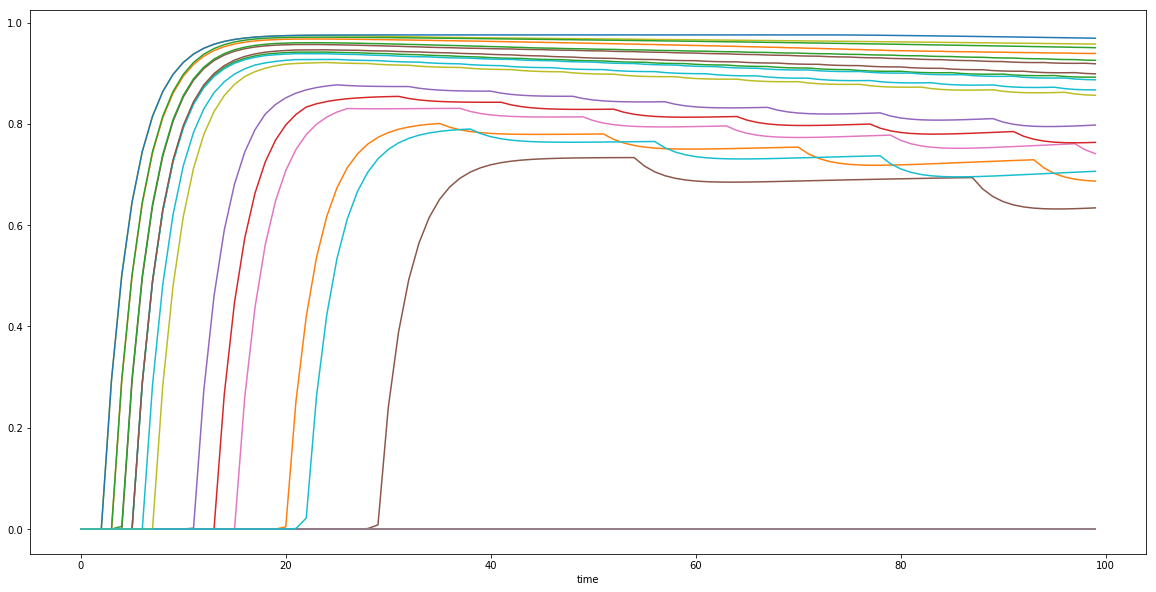

In [4]:
# Create the network
net = leabra7.net.Net()

# Set options for our layers
spec = leabra7.specs.LayerSpec(
    # For each layer, log the unit potential
    log_on_cycle=("unit_v_m", "unit_act", "unit_i_net",
                  "unit_net", "unit_gc_i", "unit_adapt",
                  "unit_spike")
)

proSpec = leabra7.specs.ProjnSpec(dist = leabra7.rand.Gaussian(mean = 0.0, var = 0.5))

# Create our layers and projections
net.new_layer("input", 1, spec)
net.new_layer("output", 30, spec)
net.new_projn("proj1", "input", "output", spec = proSpec)

# Run 200 cycles
for i in range(100):
    # Force the input unit activation to be 1
    net.force_layer(name = "input", acts = torch.ones([1,]))
    net.cycle()

fig, ax = plt.subplots()

wholeLog, partLog = net.logs(freq="cycle", name="output")

data = partLog.groupby('unit')['act', 'time'].plot(x = 'time', ax = ax, legend = False)
